# Analysis

In [43]:
import pandas as pd
from millify import millify
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
vessels_df = pd.read_csv('Dataset/vessels.csv')
vessels_df.head(5)

,Fleet and Vessel type,Unit Cost,Historical Units,Current Units,New Units,Updated Units
0,Ballistic Nuclear Submarine,9.710000e+09,4,4,NaN,NaN
1,Nuclear Submarine,5.710000e+09,7,6,NaN,NaN
2,Aircraft Carriers,4.500000e+09,0,2,NaN,NaN
3,Landing Platform Docks/Helicopters,2.250000e+08,3,2,NaN,NaN
4,Destroyers,1.050000e+09,6,6,NaN,NaN


In [3]:
land_equipment_df = pd.read_csv('Dataset/land_equipment.csv')
land_equipment_df.head(5)

,Platform type and platform,Unit Cost,Historical Units,Current Units,New Units,Updated Units
0,Challenger 2 Main Battle Tank,8125980.0,227,219,NaN,NaN
1,Ajax,9300000.0,0,128,NaN,NaN
2,Warrior [Note 6],3900000.0,770,613,NaN,NaN
3,Coyote,350000.0,71,72,NaN,NaN
4,Foxhound,923000.0,398,395,NaN,NaN


In [4]:
aircraft_df = pd.read_csv('Dataset/aircraft.csv')
aircraft_df.head(5)

,Platform Type,Unit Cost,Historical Units,Current Units,New Units,Updated Units
0,A400M,138476100.0,7,22,NaN,NaN
1,Airseeker,293657988.0,2,3,NaN,NaN
2,C017 Globemaster,250428121.0,8,8,NaN,NaN
3,Poseidon,333000000.0,0,9,NaN,NaN
4,Lightning,119142857.0,4,35,NaN,NaN


In [5]:
rotor_df = pd.read_csv('Dataset/rotor.csv')
rotor_df.head(5)

,Platform Type,Unit Cost,Historical Units,Current Units,New Units,Updated Units
0,Apache AH-64E,35860000.0,0,38,NaN,NaN
1,Chinook,100000000.0,60,54,NaN,NaN
2,Merlin HM2 [Note 12],19000000.0,30,30,NaN,NaN
3,Merlin Mk3/3a/4/4a/iMk3,32280544.0,25,25,NaN,NaN
4,Puma,18000000.0,23,20,NaN,NaN


## Total Budget

In [7]:
def count_total(dataframe):
    total = 0

    for i, row in dataframe.iterrows():
        total += row['Current Units'] * row['Unit Cost']

    return total

In [24]:
vessels_total = count_total(vessels_df)
print('Vessel Total Cost: £' + str(vessels_total), 'or £' + millify(vessels_total))

Vessel Total Cost: £104250000000.0 or £104B


In [25]:
land_equipment_total = count_total(land_equipment_df)
print('Land Equipment Total Cost: £' + str(land_equipment_total), 'or £' + millify(land_equipment_total))

Land Equipment Total Cost: £9022165547.0 or £9B


In [27]:
aircraft_total = count_total(aircraft_df)
print('Aircraft Total Cost: £' + str(aircraft_total), 'or £' + millify(aircraft_total))

Aircraft Total Cost: £33244870078.0 or £33B


In [28]:
rotor_total = count_total(rotor_df)
print('Helicopter Total Costs: £' + str(rotor_total), 'or £', millify(rotor_total))

Helicopter Total Costs: £10030078976.0 or £ 10B


In [30]:
total_budget = vessels_total + land_equipment_total + aircraft_total + rotor_total
print('Total Budget: £' + str(total_budget), 'or £' + millify(total_budget))

Total Budget: £156547114601.0 or £157B


## Calculations

In [42]:
print('Land Equipment Percentage of Total Budget:', f'{(land_equipment_total / total_budget * 100):.2f}' + '%')

Land Equipment Percentage of Total Budget: 5.76%


([<matplotlib.patches.Wedge at 0x17421f070>,
 [Text(-0.5478048498541116, 0.953891946960616, 'Vessels'),
  Text(-0.37423824962893754, -1.034381811767139, 'Land Equipment'),
  Text(0.7106170818522819, -0.8396566935240543, 'Air (aircraft & helicopter)')],
 [Text(-0.2988026453749699, 0.5203046983421541, '66.6%'),
  Text(-0.2041299543430568, -0.564208260963894, '5.8%'),
  Text(0.3876093173739719, -0.45799456010402956, '27.6%')])

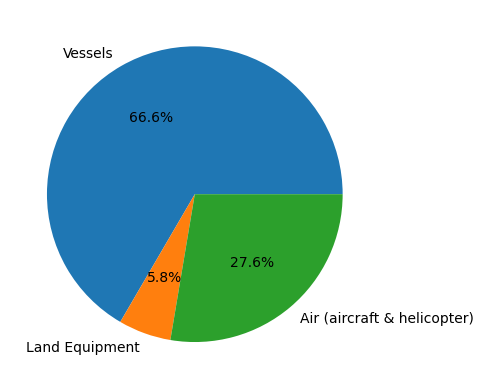

In [50]:
plt.pie([vessels_total, land_equipment_total, aircraft_total + rotor_total],
        labels=['Vessels', 'Land Equipment', 'Air (aircraft & helicopter)'],
        autopct='%1.1f%%')